# Exploratory Data Analysis - Assignment

## 🔍 Overview
This lab is designed to help you practice exploratory data analysis using Python. You will work with some housing data for the state of California. You will use various data visualization and analysis techniques to gain insights and identify patterns in the data, and clean and preprocess the data to make it more suitable for analysis. The lab is divided into the following sections:

- Data Loading and Preparation
- Data Visualization
- Data Cleaning and Preprocessing (using visualizations)

## 🎯 Objectives
This assignment assess your ability to:
- Load and pre-process data using `pandas`
- Clean data and preparing it for analysis
- Use visualization techniques to explore and understand the data
- Use visualization techniques to identify patterns and relationships in the data
- Use visualization to derive insights from the data
- Apply basic statistical analysis to derive insights from the data
- Communicate your findings through clear and effective data visualizations and summaries

#### Package Imports
We will keep coming back to this cell to add "import" statements, and configure libraries as we need

In [1]:
# Common imports
import numpy as np
import pandas as pd
from scipy.stats import trim_mean

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Install seaborn if not already installed
%pip install seaborn
import seaborn as sns

# Configure pandas to display 500 rows; otherwise it will truncate the output
pd.set_option('display.max_rows', 500)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Housing Data in California

### Task 1:  Load the dataset
The dataset is available in the `data/housing.csv` file. Check the file to determine the delimiter and/or the appropriate pandas method to use to load the data.

Make sure you name the variable `housing` and that you use the appropriate pandas method to load the data.

In [2]:
# 💻 Import the dataset in the project (data/housing.csv) into a dataframe called (housing)
import pandas as pd

# Load the dataset
housing = pd.read_csv("data/housing.csv")

# Display the first few rows
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Task 2: Confirm the data was loaded correctly

#### 2.1: Get the first 6 records of the dataset

In [3]:
# 💻 Get the first 6 records of the dataframe
housing.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


#### 2.2: Get the last 7 records of the dataset

In [4]:
# 💻 Get the last 7 records of the dataframe
housing.tail(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


#### 2.3: Get a random sample of 10 records

In [5]:
# 💻 Get a random 10 records of the dataframe
housing.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7964,-118.19,33.86,46.0,1824.0,438.0,1200.0,451.0,3.4375,156700.0,<1H OCEAN
10778,-117.90,33.65,30.0,1634.0,373.0,771.0,364.0,3.4125,284100.0,<1H OCEAN
14662,-117.13,32.80,33.0,2731.0,456.0,1263.0,445.0,4.5568,175300.0,NEAR OCEAN
386,-122.29,37.90,52.0,1604.0,263.0,594.0,286.0,5.3380,270900.0,NEAR BAY
19065,-122.46,38.29,21.0,2423.0,560.0,1098.0,503.0,2.3640,173300.0,NEAR BAY
9258,-120.06,36.96,44.0,1288.0,295.0,723.0,287.0,1.6534,61400.0,INLAND
2686,-115.53,32.97,35.0,1583.0,340.0,933.0,318.0,2.4063,70700.0,INLAND
20365,-118.92,34.18,17.0,2400.0,352.0,1067.0,323.0,6.3522,259300.0,<1H OCEAN
303,-122.18,37.77,27.0,909.0,236.0,396.0,157.0,2.0786,97500.0,NEAR BAY
19968,-119.09,36.21,43.0,1335.0,280.0,943.0,288.0,1.9861,47700.0,INLAND


#### 2.4: Get information about the dataset, including the number of rows, number of columns, column names, and data types of each column

In [6]:
# 💻 Show information about the different data columns (columns, data types, ...etc.)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


> 🚩 This is a good point to commit your code to your repository.

### Task 3: Understand the data types
For each of the 10 columns, Identify the data type: (Numerical-Continuous, Numerical-Discrete, Categorical-Ordinal, Categorical-nominal )

<details>
<summary>Click here for the data type diagram</summary>

  ![Data types](https://miro.medium.com/max/1400/1*kySPZcf83qLOuaqB1vJxlg.jpeg)
</details>

> 🚩 This is a good point to commit your code to your repository.

### Task 4: Understand the data
#### 4.1: Get the summary statistics for the numerical columns

In [7]:
# 💻 Show the descriptive statistics information about the columns in the data frame
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### 4.2: For the categorical columns, get the frequency counts for each category

<details>
  <summary>🦉 Hints</summary>

  - Use the `value_counts()` method on the categorical columns
</details>

In [8]:
# 💻 Show the frequency of the values in the ocean_proximity column
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

> 🚩 This is a good point to commit your code to your repository.

### Task 5: Visualize the data

#### 5.1: Visualize the distribution of the numerical columns
In a single figure, plot the histograms for all the numerical columns. Use a bin size of 50 for the histograms

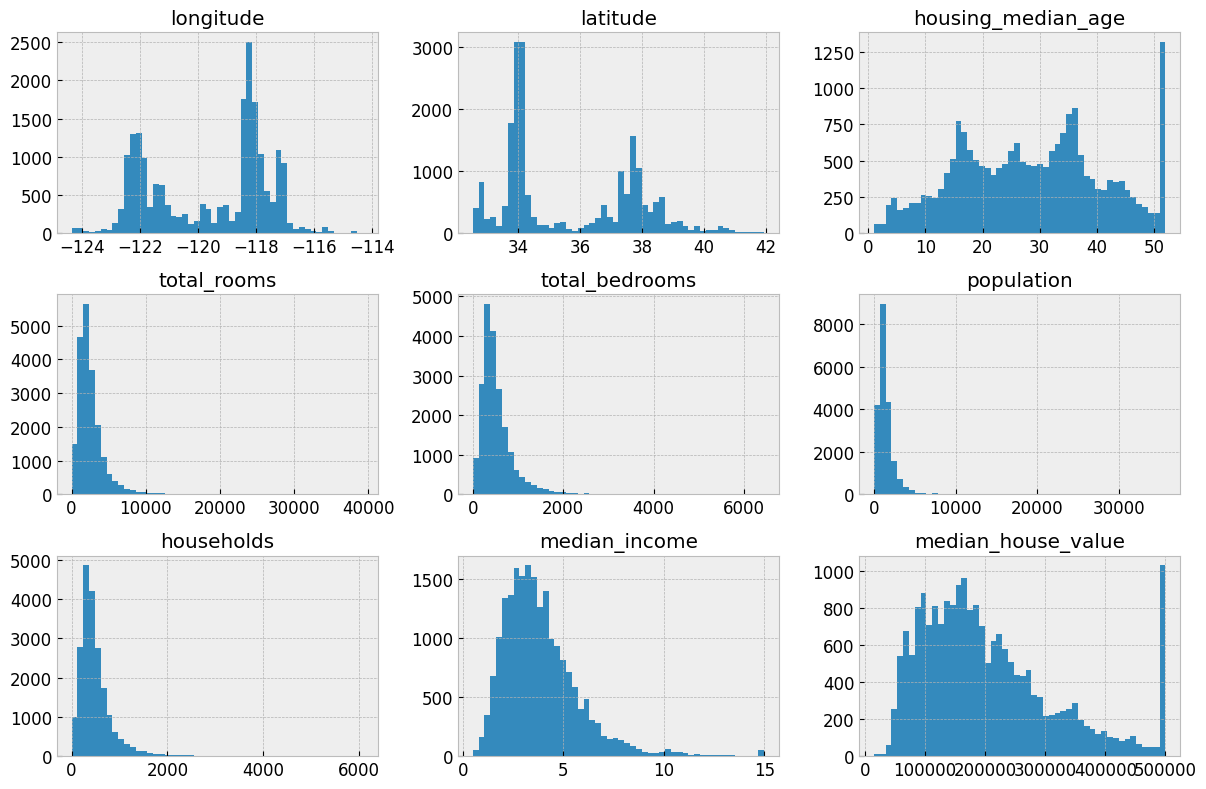

In [9]:
# 💻 Plot a histogram of all the data features( with a bin size of 50)
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8))
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### 5.2: Visualize the distribution of only one column
Plot the histogram for the `median_income` column. Use a bin size of 50 for the histogram

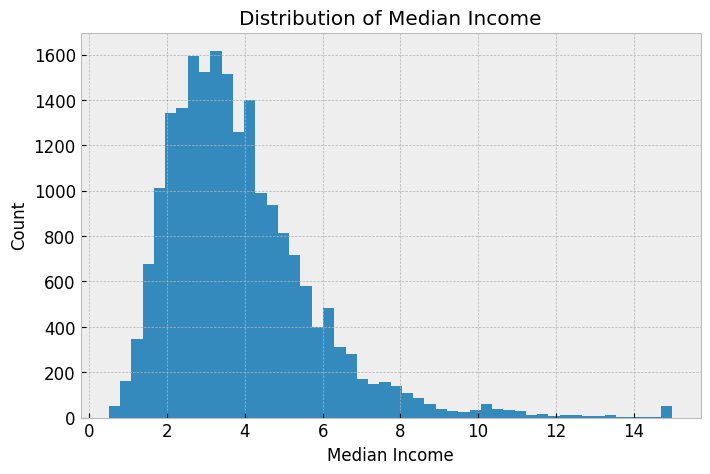

In [10]:
# 💻 plot a histogram of only the median_income
housing['median_income'].hist(bins=50, figsize=(8, 5))
plt.xlabel('Median Income')
plt.ylabel('Count')
plt.title('Distribution of Median Income')
plt.show()


> 🚩 This is a good point to commit your code to your repository.

#### 5.3: Visualize the location of the houses using a scatter plot
In a single figure, plot a scatter plot of the `longitude` and `latitude` columns. 


Try this twice, once setting the `alpha` parameter to set the transparency of the points to 0.1, and once without setting the `alpha` parameter.

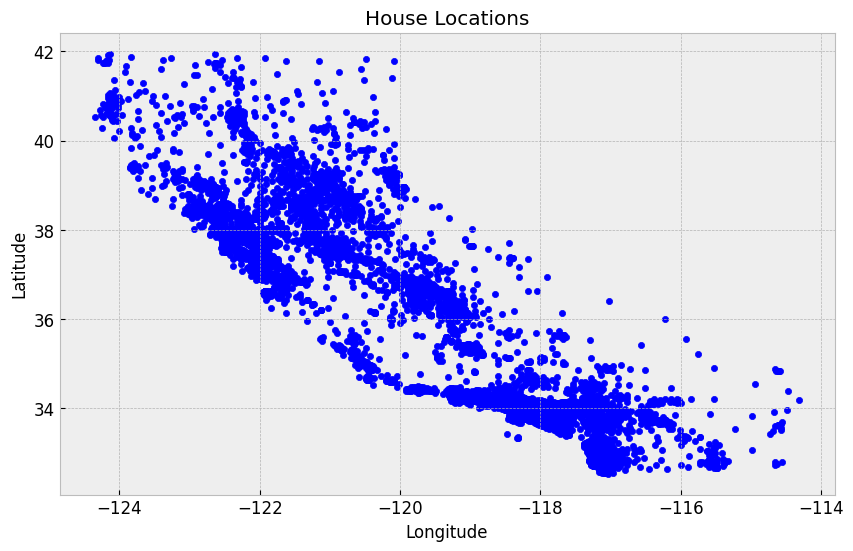

In [11]:
# 💻 scatter plat without alpha
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 6))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Locations')
plt.show()


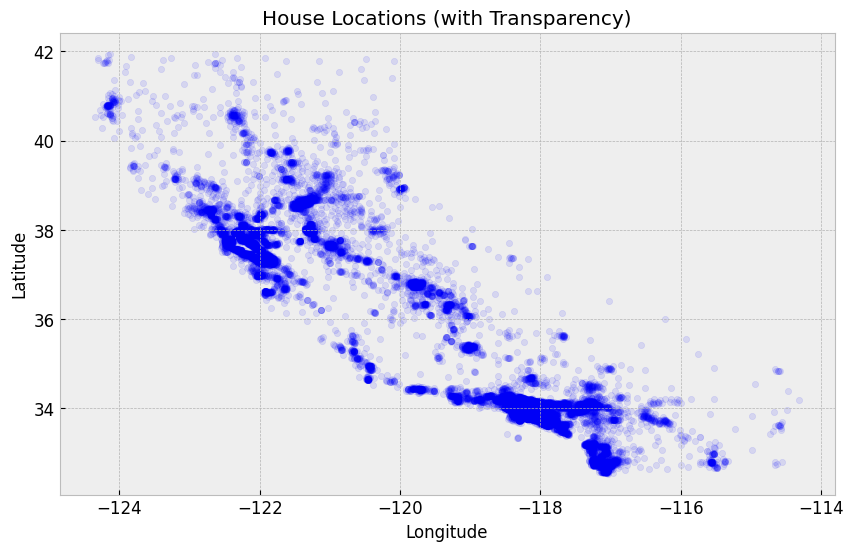

In [12]:
# 💻 scatter plat with alpha
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, figsize=(10, 6))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Locations (with Transparency)')
plt.show()


> 🚩 This is a good point to commit your code to your repository.

💯✨ For 3 Extra Credit points; Use the Plotly express to plot the scatter plot on a map of california

(📜 Check out the examples on their docs)[https://plotly.com/python/scatter-plots-on-maps/]

In [1]:
# 💻💯✨ Plot the data on a map of California
%pip install plotly
import plotly.express as px

fig = px.scatter_mapbox(housing, lat="latitude", lon="longitude", 
                        zoom=5, mapbox_style="carto-positron",
                        title="Housing Locations on Map of California")
fig.show()


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



NameError: name 'housing' is not defined

> 🚩 This is a good point to commit your code to your repository.

### Task 6: Explore the data and find correlations

#### 6.1: Generate a correlation matrix for the numerical columns

In [14]:
# 💻 Get the correlation matrix of the housing data, excluding the 'ocean_proximity' column
corr_matrix = housing.drop('ocean_proximity', axis=1).corr()
print(corr_matrix)



                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

#### 6.2: Get the Correlation data fro the `median_house_age` column
sort the results in descending order

In [16]:
# 💻 Get the correlation data for just the housing_median_age
corr_house_age = corr_matrix['housing_median_age'].sort_values(ascending=False)
print(corr_house_age)


housing_median_age    1.000000
median_house_value    0.105623
latitude              0.011173
longitude            -0.108197
median_income        -0.119034
population           -0.296244
households           -0.302916
total_bedrooms       -0.320451
total_rooms          -0.361262
Name: housing_median_age, dtype: float64


#### 6.2: Visualize the correlation matrix using a heatmap
- use the coolwarm color map
- show the numbers on the heatmap


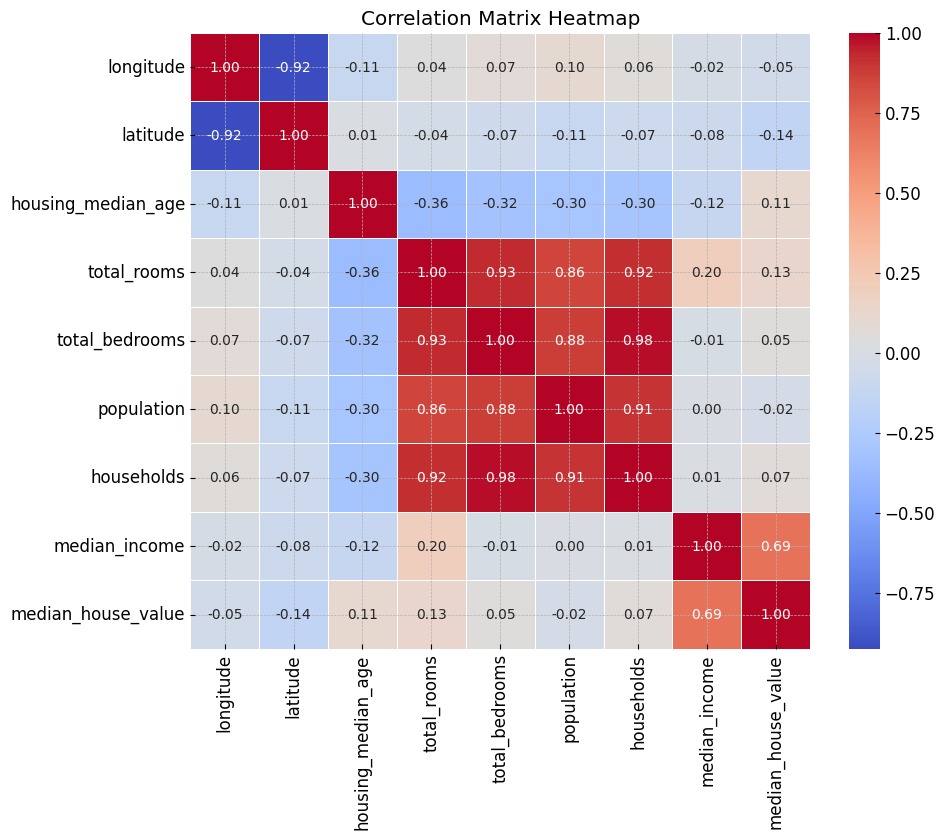

In [17]:
# 💻 Plot the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


#### 6.3: Visualize the correlations between some of the features using a scatter matrix
- Plot a scatter matrix for the `total_rooms`, `median_house_age`, `median_income`, and `median_house_value` columns

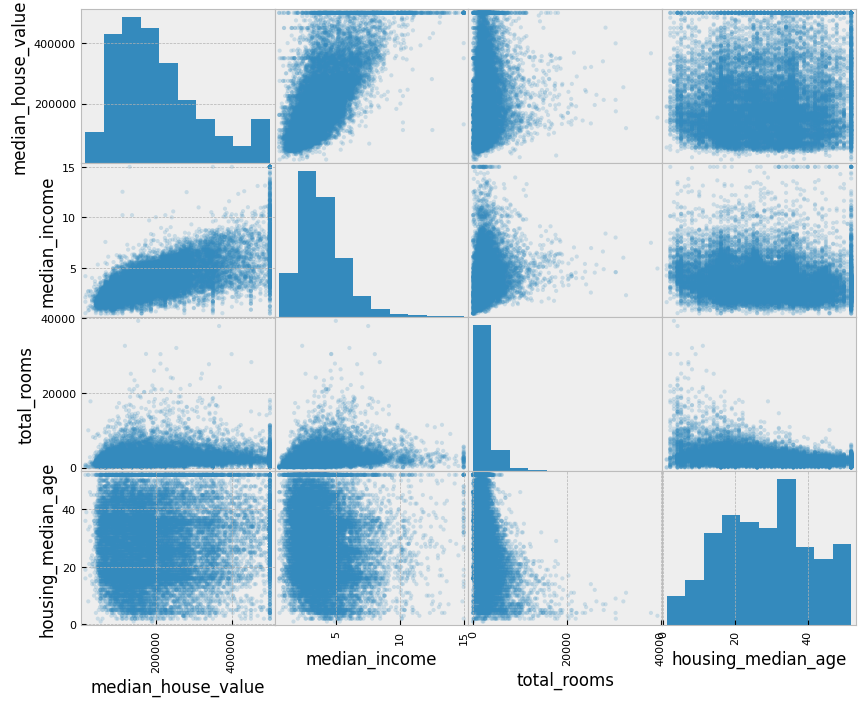

In [19]:
# 💻 using Pandas Scatter Matrix Plotting, Plot the scatter matrix for (median_house_value, median_income, total_rooms, housing_median_age)
from pandas.plotting import scatter_matrix

scatter_features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[scatter_features], figsize=(10, 8), alpha=0.2)
plt.show()


#### 6.4: Visualize the correlations between 2 features using a scatter plot
- use an `alpha` value of 0.1

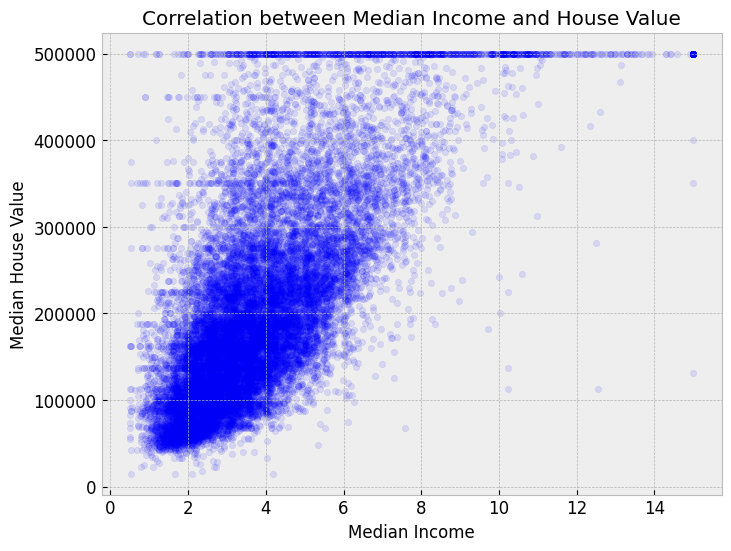

In [20]:
# 💻 Plot the scatter plot for just (median_income and median_house_value)
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, figsize=(8, 6))
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Correlation between Median Income and House Value")
plt.show()


#### 6.5: ❓ What do you notice about the chart? what could that mean?
What could the lines of values at the top of the chart mean here?

The chart likely represents a correlation matrix of the housing dataset, where the values indicate the strength and direction of the relationships between different features. The lines of values at the top of the chart are likely the names of the features being compared, helping to identify which variables are correlated with each other. High positive or negative values suggest strong relationships between features, such as a high correlation between sqft_living and price, which might indicate that larger houses tend to have higher prices. Weak correlations, close to 0, suggest no significant linear relationship between those features. The diagonal values are always 1, as each feature is perfectly correlated with itself.

> 🚩 This is a good point to commit your code to your repository.

### Task 7: Data Cleaning - Duplicate Data

#### 7.1: Find duplicate data

In [23]:
# 💻 Identify the duplicate data in the dataset
duplicates = housing[housing.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


### Task 8: Data Cleaning - Missing Data

#### 8.1: Find missing data

In [24]:
# 💻 Identify the missing data in the dataset
missing_data = housing.isna().sum()  # or housing.isnull().sum()
print(missing_data)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


#### 8.2: show a sample of 5 records of the rows with missing data
Notice there are 2 keywords here: `sample` and (rows with missing data)

<details>
  <summary>🦉 Hints:</summary>

  * You'll do pandas filtering here
  * You'll need to use the `isna()` or `isnull()` method on the 1 feature with missing data. to find the rows with missing data
  * you'll need to use the `sample()` method to get a sample of 5 records of the results
</details>

In [25]:
# 💻 use Pandas Filtering to show all the records with missing `total_bedrooms` field
missing_total_bedrooms = housing[housing['total_bedrooms'].isna()]
sample_missing = missing_total_bedrooms.sample(5)
print(sample_missing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14331    -117.15     32.72                51.0       1321.0             NaN   
3529     -118.53     34.26                18.0       3674.0             NaN   
4629     -118.30     34.07                18.0       3759.0             NaN   
15030    -117.02     32.78                31.0       2567.0             NaN   
5236     -118.23     33.94                36.0       1110.0             NaN   

       population  households  median_income  median_house_value  \
14331       781.0       499.0         1.3071            250000.0   
3529       1590.0       550.0         8.1760            308400.0   
4629       3296.0      1462.0         2.2708            175000.0   
15030      1198.0       499.0         3.4659            163000.0   
5236       1417.0       302.0         2.3333             92100.0   

      ocean_proximity  
14331      NEAR OCEAN  
3529        <1H OCEAN  
4629        <1H OCEAN  
15030       <1H OCEA

#### 8.3: Calculate the central tendency values of the missing data feature
* Calculate the mean, median, trimmed mean

In [27]:
# 💻 get the mean, median and trimmed mean of the total_bedrooms column
import numpy as np
from scipy import stats

# Calculate mean
total_bedrooms_mean = housing['total_bedrooms'].mean()

# Calculate median
total_bedrooms_median = housing['total_bedrooms'].median()

# Calculate trimmed mean (remove top and bottom 10% of data)
total_bedrooms_trimmed_mean = stats.trim_mean(housing['total_bedrooms'].dropna(), proportiontocut=0.1)

print(f"Median: {total_bedrooms_median}")
print(f"Mean: {total_bedrooms_mean}")
print(f"Trimmed Mean: {total_bedrooms_trimmed_mean}")


Median: 435.0
Mean: 537.8705525375618
Trimmed Mean: 471.43818437633814


#### 8.4: Visualize the distribution of the missing data feature
* Plot a histogram of the missing data feature (total_bedrooms)

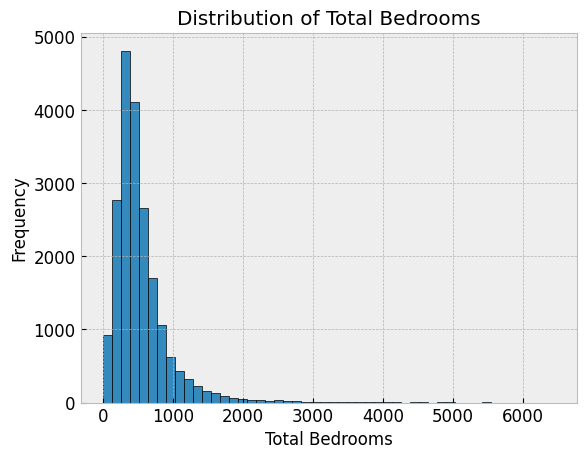

In [28]:
# 💻 Plot the histogram of the total_bedrooms column
import matplotlib.pyplot as plt

housing['total_bedrooms'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Total Bedrooms')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.show()


#### 8.5: Choose one of the central tendency values and use it to fill in the missing data
* Justify your choice
* Don't use the `inplace` parameter, instead, create a new dataframe with the updated values. (this is a bit challenging)
* show the first 5 records of the new dataframe to confirm we got the full dataframe

[📜 You should find a good example here](https://www.sharpsightlabs.com/blog/pandas-fillna/#example-2)

In [29]:
# 💻 Fill the missing values in the total_bedrooms column with an appropriate value, then show the first 5 records of the new dataframe
housing_filled = housing.copy()  # Create a new dataframe
housing_filled['total_bedrooms'].fillna(total_bedrooms_median, inplace=False)

# Show the first 5 records of the new dataframe
print(housing_filled.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


❓ Why did you choose this value?

We are filling with the median because it's less affected by outliers compared to the mean, making it a more robust choice for missing data imputation in a column like total_bedrooms.

#### 8.6: Confirm that there are no more missing values in the new dataframe
* make sure the dataframe contains all features, not just the `total_bedrooms` feature

In [30]:
# 💻 Confirm the new dataframe has no missing values
missing_data_after_imputation = housing_filled.isna().sum()
print(missing_data_after_imputation)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


#### 8.7: Dropping the missing data
assume we didn't want to impute the missing data, and instead, we wanted to drop the rows with missing data.
* don't use the `inplace` parameter, instead, create a new dataframe with the updated values.

In [31]:
# 💻 drop the missing rows of the total_bedroom and save it to a new dataframe
housing_dropped = housing.dropna(subset=['total_bedrooms'])

# Show the first 5 records of the new dataframe
print(housing_dropped.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


#### 8.8: Confirm that there are no more missing values in the new dataframe
* make sure the dataframe contains all features, not just the `total_bedrooms` feature

In [34]:
# 💻 Confirm the new dataframe has no missing values
missing_data_after_dropping = housing_dropped.isna().sum()
print(missing_data_after_dropping)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


> 🚩 This is a good point to commit your code to your repository.

## Wrap up
Remember to update the self reflection and self evaluations on the `README` file.

Make sure you run the following cell; this converts this Jupyter notebook to a Python script. and will make the process of reviewing your code on GitHub easier

In [33]:
# 🦉: The following command converts this Jupyter notebook to a Python script.
!jupyter nbconvert --to python notebook.ipynb

[NbConvertApp] Converting notebook notebook.ipynb to python
[NbConvertApp] Writing 14706 bytes to notebook.py


> 🚩 **Make sure** you save the notebook and make one final commit here